## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [5]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:

def build_mlp(input_shape, num_class=10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu', name='hidden_layer1', kernel_regularizer=keras.regularizers.l2(1e-4))(input_layer)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dense(units=256, activation='relu', name='hidden_layer2')(x)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dense(units=128, activation='relu', name='hidden_layer3')(x)
    x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=num_class, activation='softmax', name='output')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
MOMENTUM = 0.95

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
results['exp'] = {'loss': model.history.history["loss"],
                    'val_loss': model.history.history["val_loss"],
                    'train_acc': model.history.history["accuracy"],
                    'val_acc': model.history.history["val_accuracy"]}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

50000/50000 [==============================] - 19s 386us/step - loss: 1.5964 - accuracy: 0.4512 - val_loss: 1.6624 - val_accuracy: 0.4352
Epoch 46/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.5949 - accuracy: 0.4529 - val_loss: 1.5974 - val_accuracy: 0.4610
Epoch 47/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.5787 - accuracy: 0.4588 - val_loss: 1.5805 - val_accuracy: 0.4652
Epoch 48/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.5752 - accuracy: 0.4606 - val_loss: 1.6472 - val_accuracy: 0.4438
Epoch 49/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.5827 - accuracy: 0.4555 - val_loss: 1.5583 - val_accuracy: 0.4712
Epoch 50/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.5706 - accuracy: 0.4592 - val_loss: 1.5935 - val_accuracy: 0.4590


NameError: name 'batch_size' is not defined

In [14]:

# Collect results
results['exp'] = {'loss': model.history.history["loss"],
                    'val_loss': model.history.history["val_loss"],
                    'train_acc': model.history.history["accuracy"],
                    'val_acc': model.history.history["val_accuracy"]}


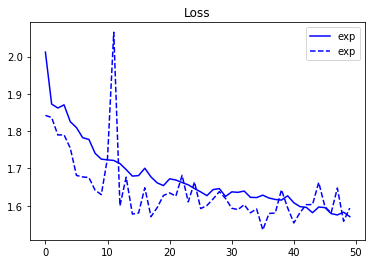

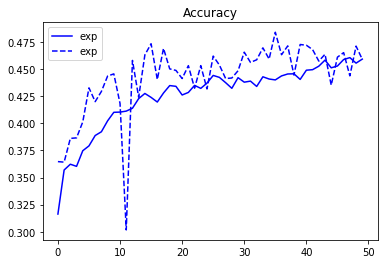

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['b', 'r', 'b', 'y', 'm', 'k']
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()